Problem 1: Data from yfinance
## YFINANCE
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

• Facebook (META)

• Apple (AAPL)

• Amazon (AMZN)

• Netflix (NFLX)

• Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two-digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.


https://github.com/ranaroussi/yfinance

In [ ]:
# Importing yfinance and getting the data ready to run
import yfinance as yf

In [64]:
dat = yf.Ticker("META")

In [65]:
dat.info

{'address1': '1 Meta Way',
 'city': 'Menlo Park',
 'state': 'CA',
 'zip': '94025',
 'country': 'United States',
 'phone': '650 543 4800',
 'website': 'https://investor.atmeta.com',
 'industry': 'Internet Content & Information',
 'industryKey': 'internet-content-information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'sectorKey': 'communication-services',
 'sectorDisp': 'Communication Services',
 'longBusinessSummary': 'Meta Platforms, Inc. engages in the development of products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality and mixed reality headsets, augmented reality, and wearables worldwide. It operates through two segments, Family of Apps (FoA) and Reality Labs (RL). The FoA segment offers Facebook, which enables people to build community through feed, reels, stories, groups, marketplace, and other; Instagram that brings people closer through instagram feed, s

In [66]:
dat.calendar

{'Dividend Date': datetime.date(2025, 9, 29),
 'Ex-Dividend Date': datetime.date(2025, 9, 22),
 'Earnings Date': [datetime.date(2025, 10, 29)],
 'Earnings High': 7.56,
 'Earnings Low': 5.94,
 'Earnings Average': 6.67047,
 'Revenue High': 50747400000,
 'Revenue Low': 46287000000,
 'Revenue Average': 49388753250}

In [67]:
dat.analyst_price_targets

{'current': 751.075,
 'high': 1086.0,
 'low': 616.0,
 'mean': 867.1763,
 'median': 877.5}

In [68]:
dat.quarterly_income_stmt

,2025-06-30,2025-03-31,2024-12-31,2024-09-30,2024-06-30
Tax Effect Of Unusual Items,2.156000e+07,2.088000e+07,-4.436523e+07,1.320000e+06,-1.825023e+07
Tax Rate For Calcs,1.069930e-01,9.000000e-02,1.152340e-01,1.200000e-01,1.086320e-01
Normalized EBITDA,2.492100e+10,2.229000e+10,2.864800e+10,2.204600e+10,1.903900e+10
Total Unusual Items,1.960000e+08,2.320000e+08,-3.850000e+08,1.100000e+07,-1.680000e+08
Total Unusual Items Excluding Goodwill,1.960000e+08,2.320000e+08,-3.850000e+08,1.100000e+07,-1.680000e+08
Net Income From Continuing Operation Net Minority Interest,1.833700e+10,1.664400e+10,2.083800e+10,1.568800e+10,1.346500e+10
Reconciled Depreciation,4.342000e+09,3.900000e+09,4.460000e+09,4.027000e+09,3.637000e+09
Reconciled Cost Of Revenue,8.491000e+09,7.572000e+09,8.839000e+09,7.375000e+09,7.308000e+09
EBITDA,2.511700e+10,2.252200e+10,2.826300e+10,2.205700e+10,1.887100e+10
EBIT,2.077500e+10,1.862200e+10,2.380300e+10,1.803000e+10,1.523400e+10


In [70]:
dat.history(period='5d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-21 00:00:00-04:00,736.020020,738.500000,728.750000,733.270020,7647300,0.0,0.0
2025-10-22 00:00:00-04:00,733.830017,740.599976,724.030029,733.409973,8734500,0.0,0.0
2025-10-23 00:00:00-04:00,734.700012,742.409973,733.099976,734.000000,9856000,0.0,0.0
2025-10-24 00:00:00-04:00,736.789978,741.210022,731.150024,738.359985,9137700,0.0,0.0
2025-10-27 00:00:00-04:00,749.570007,755.739990,748.530029,751.400024,4710457,0.0,0.0


In [71]:
dat.option_chain(dat.options[0]).calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,META251031C00300000,2025-10-27 13:35:28+00:00,300.0,450.00,448.75,452.40,10.600006,2.412382,2.0,12,3.743165,True,REGULAR,USD
1,META251031C00310000,2025-10-27 15:03:29+00:00,310.0,442.50,440.00,442.60,13.500000,3.146853,1.0,11,2.910159,True,REGULAR,USD
2,META251031C00320000,2025-10-20 17:59:17+00:00,320.0,413.45,428.75,430.95,0.000000,0.000000,1.0,11,0.000010,True,REGULAR,USD
3,META251031C00330000,2025-10-03 13:59:05+00:00,330.0,388.96,418.80,422.50,0.000000,0.000000,4.0,8,3.420900,True,REGULAR,USD
4,META251031C00340000,2025-10-03 14:49:15+00:00,340.0,380.57,408.55,412.50,0.000000,0.000000,2.0,7,3.307131,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,META251031C01040000,2025-10-27 13:45:57+00:00,1040.0,0.01,0.00,0.01,0.000000,0.000000,8.0,585,0.796877,False,REGULAR,USD
134,META251031C01050000,2025-10-27 13:39:39+00:00,1050.0,0.01,0.00,0.01,0.000000,0.000000,26.0,1216,0.812502,False,REGULAR,USD
135,META251031C01060000,2025-10-21 19:58:07+00:00,1060.0,0.02,0.00,0.01,0.000000,0.000000,11.0,40,0.843752,False,REGULAR,USD
136,META251031C01070000,2025-10-23 13:40:46+00:00,1070.0,0.01,0.00,0.01,0.000000,0.000000,3.0,413,0.859376,False,REGULAR,USD


In [81]:
tickers = yf.Tickers('META AAPL GOOG')

In [ ]:
yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d')

/tmp/ipykernel_2201/1940627069.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d')
[                       0%                       ]

[*********************100%***********************]  5 of 5 completed


Price            Close                                                   \
Ticker            AAPL        AMZN        GOOG        META         NFLX   
Date                                                                      
2025-10-21  262.769989  222.029999  251.339996  733.270020  1241.349976   
2025-10-22  258.450012  217.949997  252.529999  733.409973  1116.369995   
2025-10-23  259.579987  221.089996  253.729996  734.000000  1113.589966   
2025-10-24  262.820007  224.210007  260.510010  738.359985  1094.689941   
2025-10-27  265.922302  227.639999  267.220001  751.755005  1099.319946   

Price             High                                                   ...  \
Ticker            AAPL        AMZN        GOOG        META         NFLX  ...   
Date                                                                     ...   
2025-10-21  265.290009  223.320007  255.380005  738.500000  1248.599976  ...   
2025-10-22  262.850006  220.009995  257.179993  740.599976  1157.599976  ...   
2025-10-23  260.619995  221.300003  255.860001  742.409973  1127.829956  ...   
2025-10-24  264.130005  225.399994  262.510010  741.210022  1114.510010  ...   
2025-10-27  267.049988  228.399994  267.720001  755.739990  1102.249878  ...   

Price             Open                                                   \
Ticker            AAPL        AMZN        GOOG        META         NFLX   
Date                                                                      
2025-10-21  261.880005  218.429993  255.250000  736.020020  1242.829956   
2025-10-22  262.649994  219.300003  255.009995  733.830017  1142.900024   
2025-10-23  259.940002  219.000000  253.699997  734.700012  1126.900024   
2025-10-24  261.190002  221.970001  257.299988  736.789978  1111.000000   
2025-10-27  264.880005  227.809998  265.364990  749.570007  1100.670044   

Price         Volume                                         
Ticker          AAPL      AMZN      GOOG     META      NFLX  
Date                                                         
2025-10-21  46695900  50494600  27836400  7647300   6508200  
2025-10-22  45015300  44308500  19650200  8734500  14789000  
2025-10-23  32754900  31540000  13241300  9856000   6849700  
2025-10-24  38221700  38620200  18375100  9137700   6009900  
2025-10-27  15948316  14482285   9366555  5215120   2419925  

[5 rows x 25 columns]

In [94]:
df = yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d')

/tmp/ipykernel_2201/3322423399.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d')
[                       0%                       ]

[*********************100%***********************]  5 of 5 completed


In [84]:
type(df)

pandas.core.frame.DataFrame

In [85]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [92]:
import matplotlib as plot

<Axes: xlabel='Date'>

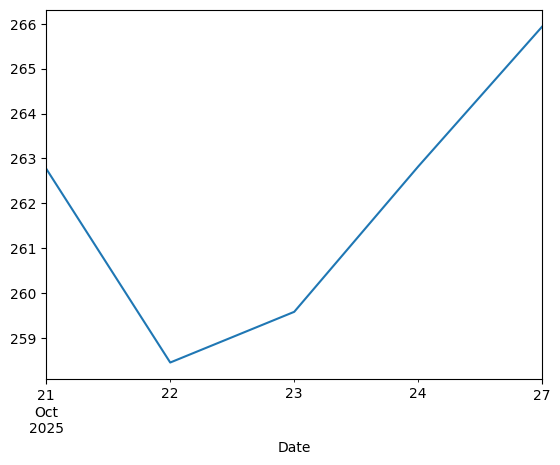

In [93]:
df[('Close', 'AAPL')].plot()

## End

Problem 2: Plotting Data
Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

Problem 3: Script
Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

Problem 4: Automation
Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.